In [1]:
# create the file structure
%%bash
rm -r sample_data
mkdir startingData code results figures

In [2]:
#important the dataset as a Pandas DataFrame
import pandas as pd
dw=pd.read_csv('https://www.lerner.ccf.org/qhs/datasets/LiverSteatosis.csv')

In [3]:
#view the file
dw

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
0,61.2,2,162.6,127.2,48.1,35.0,0.0,1.0,1.0,1.0,...,202.0,50.0,124.0,28.0,22.0,14.0,3.0,0,1.0,1.0
1,40.4,2,165.1,137.8,50.5,23.0,1.0,1.0,1.0,1.0,...,213.0,49.0,143.0,21.0,50.0,78.0,6.0,0,0.0,1.0
2,38.5,1,193.0,217.1,58.3,11.0,1.0,1.0,1.0,0.0,...,146.0,51.0,78.0,17.0,30.0,35.0,3.0,1,1.0,1.0
3,65.0,1,161.0,131.0,50.5,20.0,1.0,1.0,1.0,0.0,...,191.0,55.0,113.0,NaN,21.0,26.0,1.0,0,1.0,1.0
4,56.3,2,165.1,124.0,45.5,22.0,0.0,1.0,1.0,0.0,...,134.0,46.0,57.0,31.0,12.0,15.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,45.0,1,186.7,136.0,39.0,15.0,0.0,0.0,1.0,1.0,...,164.0,65.0,83.0,16.0,30.0,47.0,1.0,0,1.0,1.0
439,46.0,2,165.1,121.7,44.6,21.0,1.0,1.0,1.0,1.0,...,280.0,68.0,173.0,39.0,34.0,34.0,0.0,0,0.0,0.0
440,40.0,2,154.9,108.0,45.0,15.0,0.0,0.0,0.0,1.0,...,217.0,53.0,153.0,11.0,27.0,19.0,0.0,0,0.0,0.0
441,37.6,2,167.6,141.1,50.2,20.0,0.0,0.0,0.0,0.0,...,153.0,64.0,80.0,9.0,14.0,14.0,0.0,0,1.0,0.0


In [4]:
#export the above DataFrame to Results
dw.to_csv('/content/startingData/RAW.csv')

In [5]:
#scan the new DataFrame for NaN values
dw.isnull().sum()

Age                  0
Sex                  0
Height               0
Weight               0
BMI                  0
Obesity Duration     7
DM                   2
MET Syndrome         2
HTN                  3
HPL                  2
TG                  32
CHOL                32
HDL                 32
LDL                 48
VLDL                50
AST                  6
ALT                  6
NAS                 25
Fibrosis             0
LS+ US              22
LS+ Biopsy           0
dtype: int64

In [6]:
#delete any rows that contain NaN values in "CHOL", "LS+ US" and "TG" columns and convert the rest of the NaN values to the string 'Not given'
dw_reduced=dw.dropna(subset=['CHOL'])
dw_reduced=dw_reduced.dropna(subset=['LS+ US'])
dw_reduced=dw_reduced.dropna(subset=['TG'])
dw_reduced_cleaned=dw_reduced.fillna('Not given')

In [7]:
#confirm that all NaN values have been taken care of
dw_reduced_cleaned.isnull().sum()

Age                 0
Sex                 0
Height              0
Weight              0
BMI                 0
Obesity Duration    0
DM                  0
MET Syndrome        0
HTN                 0
HPL                 0
TG                  0
CHOL                0
HDL                 0
LDL                 0
VLDL                0
AST                 0
ALT                 0
NAS                 0
Fibrosis            0
LS+ US              0
LS+ Biopsy          0
dtype: int64

In [8]:
#identify patients with inconclusive liver steatosis using the "LS+ US"column and remove them
inconclupatients = dw_reduced_cleaned['LS+ US'].loc[(dw_reduced_cleaned['LS+ US']==0.5)]
dw2=dw_reduced_cleaned.drop(inconclupatients.index)

In [9]:
#identify patients with inconclusive liver steatosis using the "LS+ Biopsy"column and remove them
inconclupatients2 = dw2['LS+ Biopsy'].loc[(dw2['LS+ Biopsy']==0.5)]
dw3=dw2.drop(inconclupatients2.index)

In [10]:
#identify outliers by using the "CHOL" column and remove them
import scipy.stats as stats
qOne = dw3['CHOL'].quantile(0.25)
qThree = dw3['CHOL'].quantile(0.75)
iqr = stats.iqr(dw3['CHOL'])
maximum = qThree + (1.5 * iqr)
minimum = qOne - (1.5 * iqr)
iqrOutliers = dw3['CHOL'].loc[(dw3['CHOL'] < minimum) | (dw3['CHOL'] > maximum)]
dw4=dw3.drop(iqrOutliers.index)

In [11]:
#identify outliers by using the "Age" column and remove them
qOne2 = dw4['Age'].quantile(0.25)
qThree2 = dw4['Age'].quantile(0.75)
iqr2 = stats.iqr(dw4['Age'])
maximum2 = qThree2 + (1.5 * iqr2)
minimum2 = qOne2 - (1.5 * iqr2)
iqrOutliers2 = dw4['Age'].loc[(dw4['Age'] < minimum2) | (dw4['Age'] > maximum2)]
dw5=dw4.drop(iqrOutliers2.index)

In [12]:
#replace 0.0 and 1.0 in 'LS+ US' and 'LS+ Biopsy' with 'positive' and 'negative'
dw5.loc[(dw5['LS+ US'] == 1.0), 'LS+ US'] = 'positive'
dw5.loc[(dw5['LS+ US'] == 0.0), 'LS+ US'] = 'negative'
dw5.loc[(dw5['LS+ Biopsy'] == 1.0), 'LS+ Biopsy'] = 'positive'
dw5.loc[(dw5['LS+ Biopsy'] == 0.0), 'LS+ Biopsy'] = 'negative'

In [13]:
dw5

,Age,Sex,Height,Weight,BMI,Obesity Duration,DM,MET Syndrome,HTN,HPL,...,CHOL,HDL,LDL,VLDL,AST,ALT,NAS,Fibrosis,LS+ US,LS+ Biopsy
0,61.2,2,162.6,127.2,48.1,35.0,0.0,1.0,1.0,1.0,...,202.0,50.0,124.0,28.0,22.0,14.0,3.0,0,positive,positive
1,40.4,2,165.1,137.8,50.5,23.0,1.0,1.0,1.0,1.0,...,213.0,49.0,143.0,21.0,50.0,78.0,6.0,0,negative,positive
2,38.5,1,193.0,217.1,58.3,11.0,1.0,1.0,1.0,0.0,...,146.0,51.0,78.0,17.0,30.0,35.0,3.0,1,positive,positive
3,65.0,1,161.0,131.0,50.5,20.0,1.0,1.0,1.0,0.0,...,191.0,55.0,113.0,Not given,21.0,26.0,1.0,0,positive,positive
4,56.3,2,165.1,124.0,45.5,22.0,0.0,1.0,1.0,0.0,...,134.0,46.0,57.0,31.0,12.0,15.0,1.0,0,negative,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,45.0,1,186.7,136.0,39.0,15.0,0.0,0.0,1.0,1.0,...,164.0,65.0,83.0,16.0,30.0,47.0,1.0,0,positive,positive
439,46.0,2,165.1,121.7,44.6,21.0,1.0,1.0,1.0,1.0,...,280.0,68.0,173.0,39.0,34.0,34.0,0.0,0,negative,negative
440,40.0,2,154.9,108.0,45.0,15.0,0.0,0.0,0.0,1.0,...,217.0,53.0,153.0,11.0,27.0,19.0,0.0,0,negative,negative
441,37.6,2,167.6,141.1,50.2,20.0,0.0,0.0,0.0,0.0,...,153.0,64.0,80.0,9.0,14.0,14.0,0.0,0,positive,negative


In [14]:
#export the above DataFrame to Results
dw5.to_csv('/content/results/DIG.csv')

In [15]:
#calculate the statistics related to the demographics of study participants
Agemean=dw5['Age'].mean()
Agestd=dw5['Age'].std()
Heightmean=dw5['Height'].mean()
Heightstd=dw5['Height'].std()
Weightmean=dw5['Weight'].mean()
Weightstd=dw5['Weight'].std()
BMImean=dw5['BMI'].mean()
BMIstd=dw5['BMI'].std()
print 
Agemean, Agestd, Heightmean, Heightstd, Weightmean, Weightstd, BMImean, BMIstd

(46.08862433862434,
 11.65388348253714,
 168.37116402116402,
 9.271455250449597,
 133.50317460317459,
 29.96815357378484,
 46.92857142857144,
 9.184904497751486)

In [16]:
#Creat a new DataFrame storing to store the statistics.
df1 = pd.DataFrame({'Statistics':
                      ['Age', 'Height', 'Weight', 'BMI'],
                    'Value(95% CI)':
                      ['46.09 ± 23.30','168.27 ± 18.54','133.50 ± 59.94','46.94 ± 18.36 ']})
df1 = df1.set_index('Statistics')
df1

,Value(95% CI)
Statistics,
Age,46.09 ± 23.30
Height,168.27 ± 18.54
Weight,133.50 ± 59.94
BMI,46.94 ± 18.36


In [17]:
#export the above DataFrame to Results
df1.to_csv('/content/results/demographics of study participants.csv')

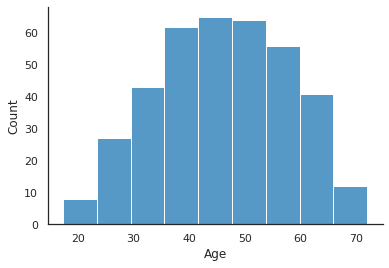

In [18]:
#draw histogram plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_context("notebook")
axes=sns.histplot(data=dw5, x='Age',edgecolor='white', bins=9)
axes.set(xlabel='Age')
sns.despine()
plt.savefig("/content/figures/Figure1.pdf", bbox_inches='tight')

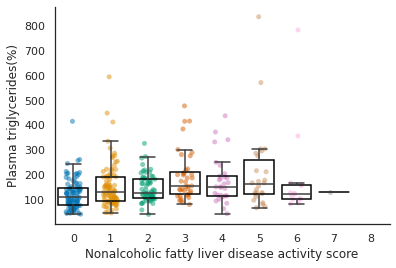

In [19]:
#draw combining plot
x_order=[0,1,2,3,4,5,6,7,8]
sns.set_style("white")
sns.set_context("notebook")
axesTwo=sns.boxplot(data=dw5, x='NAS', y='TG',order=x_order, fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, zorder=5)
sns.stripplot(data=dw5, x='NAS', y='TG', order=x_order, alpha=.5, jitter=.2, zorder=0, palette='colorblind')
axesTwo.set(xlabel='Nonalcoholic fatty liver disease activity score', ylabel='Plasma triglycerides(%)')
sns.despine()
plt.savefig("/content/figures/Figure2.pdf", bbox_inches='tight')

In [20]:
#generate a matrix of counts for the "LS+ Biopsy" and "LS+ US" columns
countmatrix=pd.crosstab(dw5['LS+ US'],dw5['LS+ Biopsy'],margins=True)
countmatrix

LS+ Biopsy,negative,positive,All
LS+ US,,,
negative,76,37,113
positive,33,232,265
All,109,269,378


In [21]:
#export the above DataFrame to Results
countmatrix.to_csv('/content/results/countmatrix')

In [22]:
def confusionMatrixMetrics(confusionMatrix):
   """
   Calculate and return a Pandas DataFrame with various metrics from a given confusion matrix.

   Args:
   countMatrix (pandas.DataFrame): A confusion matrix of actual nad predicted outcomes.
   """
   #Save the True/False Positive/Negative values from the input confusion matrix.
   TN=confusionMatrix.iloc[0][0]
   FP=confusionMatrix.iloc[1][0]
   TP=confusionMatrix.iloc[1][1]
   FN=confusionMatrix.iloc[0][1]

   #Calculate various metrics.
   Population=TN+FN+TP+FP
   Prevalence=(TP+FP)/Population
   PPV=TP/(TP+FP)
   NPV=TN/(TN+FN)
   Sensitivity=TP/(TP+FN)
   Specificity=TN/(TN+FP)
   FPR=FP/(TN+FP)
   FNR=FN/(TP+FN)
   #Creat a new DataFrame storing to store the metrics.
   df2 = pd.DataFrame({'Metric':
                      ['TP', 'TN', 'FP', 'FN',
                       'Prevalence', 'PPV', 'NPV',
                       'Sensitivity', 'Specificity',
                       'FPR', 'FNR'],
                      'Value':
                      [TP, TN, FP, FN,
                       Prevalence, PPV, NPV,
                       Sensitivity, Specificity,
                       FPR, FNR]})
   df2 = df2.set_index('Metric')

   return(df2)

In [23]:
confusionMatrixMetrics(countmatrix)

,Value
Metric,
TP,232.000000
TN,76.000000
FP,33.000000
FN,37.000000
Prevalence,0.701058
PPV,0.875472
NPV,0.672566
Sensitivity,0.862454
Specificity,0.697248


In [24]:
#test these assumptions about variance
#H0: the variances of liver steatosis group and non-liver steatosis group in cholesterol level are equal
#H1: the variances of liver steatosis group and non-liver steatosis group in cholesterol level are not equal
liversteatosis = dw5.loc[dw5['LS+ Biopsy'] == 1]
notliversteatosis = dw5.loc[dw5['LS+ Biopsy'] == 0]

stats.levene(liversteatosis['CHOL'], notliversteatosis['CHOL'])

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [25]:
# since the Levene p-value is > 0.05, we fail to reject the H0 hypothsis. Therefore, the variances of both groups are equal.

In [26]:
#H0: the mean cholesterol levels of liver steatosis group and non-liver steatosis group are not different
#H1: the mean cholesterol levels of liver steatosis group and non-liver steatosis group are different
stats.ttest_ind(liversteatosis['CHOL'], notliversteatosis['CHOL'], alternative = 'two-sided', equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

In [27]:
# since the p-value is > 0.05, we fail to reject the H0 hypothsis. Therefore, the mean cholesterol levels of liver steatosis group and non-liver steatosis group are not different

In [28]:
#test these assumptions about variance
#H0: the variances of liver steatosis group and non-liver steatosis group in age are equal
#H1: the variances of liver steatosis group and non-liver steatosis group in age are not equal
stats.levene(liversteatosis['TG'], notliversteatosis['TG'])

LeveneResult(statistic=nan, pvalue=nan)

In [29]:
# since the Levene p-value is < 0.05, we reject the H0 hypothsis. Therefore, the variances of both groups are not equal.

In [30]:
#H0: the mean plasma triglycerides levels of liver steatosis group and non-liver steatosis group are not different
#H1: the mean plasam triglycerides levels of liver steatosis group and non-liver steatosis group are different
stats.ttest_ind(liversteatosis['TG'], notliversteatosis['TG'], alternative = 'two-sided', equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [31]:
# since the Levene p-value is < 0.05, we reject the H0 hypothsis. Therefore, the mean plasam triglycerides levels of liver steatosis group and non-liver st

In [32]:
# create read me file in content folder
%%bash
cat > README.md
Since we would like to investigate the probability of applying ultrasound in diagnosing liver steatosis. After cleaning and manipulationg the data, we conducted a matrix for ultrasound results.
We calculated its specificity and sensitivity to evaluate its practical use. Besides, a histogram was drawn to visualize the distrbution of all participants' ages and a combined plot was drawn to 
visualize the distribution of plasma triglycerides at different stage of NAFLD. Finally, two t-tests were performed to see whather there were clinical parameters that could be helpful in the assessment
of NAFLD.

In [33]:
# creat read me file in code folder
%%bash
cd code
cat > README.md
Here are codes of the whole project. We imported all the data into pandas dataframe, we scan for and clean the NaN values for the data frame. Furthermore,
we excluded all the patients with inconclusive results of liver steatosis no matter in biopsy or ultrasound results. Outliers of the columns we were interested in
were also removed. A histogram and one combining plot were drawn. We further conducted a confusion matrix for the evaluation of the accuracy of ultrasound in diagnosis.
Moreover, two t-tests were performed to see whether there was a significant difference in other clinical parameters.

In [34]:
# creat read me file in figures folder
%%bash
cd figures
cat > README.md
Here are figures of the whole project. Figure 1 shows the distribution of the age of selected samples (after dropping the NaN values and the outliers of the columns we are interested in).
According to the results, most of the remaining 378 patietns are distributed from 30 years old to 65 years old.
Figure 2 shows the distribution of plasma triglycerides level in patients at different NAFLD stage. Patients with higher NAFLD scores have broader range of that, except patients with NAFLD
scores of 6 and 7. Maybe it is due to the small sample sizes.  

In [35]:
# creat read me file in startingData folder
%%bash
cd startingData
cat > README.md
Here is raw data of the whole project.